In [ ]:
# step 02
print("step 02: ")

# data analysis & visualization

step 02: 


In [ ]:
import os

import pandas as pd
import numpy as np


# 12 features + 1 class
cols = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','gpsz_stdz','tenTotal','R',"speed", 'Class']
cols_update = ['snrave','numtotal','elesnrtotal','elesnrave','snr15num','gpsz_tmean', 'tenTotal','R','Class']
cols_update = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','tenTotal','R','Class']
cols_update = cols

# 
"""log_data_hour = pd.read_csv("./logdata_090610.csv") 
print(log_data_hour.shape)"""

"""log_data_day = pd.read_csv("./logdata_0906.csv") 
print(log_data_day.shape)"""


def read_files(inout_mode):
  which_mode = "_out"
  if inout_mode==1:
    which_mode = "_in"
  #
  DIR = "./"
  fns = os.listdir(DIR)
  fns_col = []
  for fn in fns:
    if ".csv" in fn and which_mode in fn:
      fns_col.append( fn )  
  return fns_col

def read_csv(fns_col):
  csv_col = []
  for fn in fns_col:
    tmp = pd.read_csv("./" + fn) 
    csv_col.append( tmp )

  return pd.concat(csv_col)

# read collected-data
"""inout_mode = 1
fns_col = read_files(inout_mode)
collect_data_in = read_csv(fns_col)

inout_mode = 0
fns_col = read_files(inout_mode)
collect_data_out = read_csv(fns_col)

collect_data_in.shape, collect_data_out.shape"""


#
log_data_day_msr = pd.read_csv("./logdata_0906_msr.csv") 
log_data_day_msr = log_data_day_msr.loc[ log_data_day_msr["msr"]==3 ]
print(log_data_day_msr.shape)

(2312, 19)


In [ ]:
# filtering, Inter Quartile Range, by every feature
def filtering01(df_tmp, ratio=0.1):
  df_filtering = df_tmp.copy()
  col_nms = df_filtering.columns
  col_nms = list(col_nms[:-1]) # remove "Class"
  not_cover = ["msr", "mb"]
  for it in not_cover:
    if it in col_nms:
      col_nms.remove(it)
  #
  L = len(df_filtering)
  rn = int(ratio * 0.01 * L)
  for nm in col_nms:
    df_filtering = df_filtering.sample(frac = 1)
    df_filtering = df_filtering.sort_values(by=[nm])
    L = len(df_filtering)
    ratio = ratio * 0.01
    st = rn
    ed = L - rn
    print(nm, st, ed, ed-st, max(df_filtering[nm]), min(df_filtering[nm]))
    #print(df_filtering[:st])
    #print(df_filtering[ed:])
    df_filtering = df_filtering[ st:ed ]
  df_filtering = df_filtering.sample(frac = 1)
  print()
  return df_filtering


# sampling 
def sampling01(df_tmp, n1, n2, rto=0.5):
  df_sampling = df_tmp.copy()
  sampling_in = df_sampling.loc[ df_sampling["Class"]=="indoor" ] # 
  sampling_out = df_sampling.loc[ df_sampling["Class"]=="outdoor" ] # 
  print("original size: ", sampling_in.shape, sampling_out.shape)
  # filter outliers
  sampling_in = filtering01(sampling_in, ratio=rto)
  sampling_out = filtering01(sampling_out, ratio=rto)
  print("filtering size: ", sampling_in.shape, sampling_out.shape)
  sampling_in = sampling_in.sample(n=n1, random_state=1)
  sampling_out = sampling_out.sample(n=n2, random_state=1)
  print("sampling size: ", sampling_in.shape, sampling_out.shape)
  return sampling_in, sampling_out, pd.concat([sampling_in, sampling_out])



log_day_in3, log_day_out3, log_day3 = sampling01(log_data_day_msr, 230, 1500)
print("------------------------------")
"""collect_data_inout = pd.concat([collect_data_in, collect_data_out])
print(collect_data_inout.shape)
inout_num = 2000
collect_in, collect_out, collect_data = sampling01(collect_data_inout, inout_num, inout_num)"""
print()

original size:  (272, 19) (2040, 19)
number 1 271 270 18 0
snrtotal 1 269 268 486 0
snrave 1 267 266 38 0
numtotal 1 265 264 16 0
elesnrtotal 1 263 262 21536 0
elesnrave 1 261 260 1691 0
snr20num 1 259 258 15 0
snr15num 1 257 256 15 0
gpsz_tmean 1 255 254 676 0
gpsz_stdz 1 253 252 387 0
tenTotal 1 251 250 361 56
R 1 249 248 657 1
speed 1 247 246 85 0
gpsx 1 245 244 129.20798 102.18264
gpsy 1 243 242 47.60553 22.52668
gpsh 1 241 240 1553.0 -206.75

number 10 2030 2020 18 0
snrtotal 10 2010 2000 559 31
snrave 10 1990 1980 45 13
numtotal 10 1970 1960 17 3
elesnrtotal 10 1950 1940 21778 1237
elesnrave 10 1930 1920 1899 469
snr20num 10 1910 1900 16 1
snr15num 10 1890 1880 16 4
gpsz_tmean 10 1870 1860 2776 0
gpsz_stdz 10 1850 1840 616 0
tenTotal 10 1830 1820 389 111
R 10 1810 1800 93 1
speed 10 1790 1780 115 0
gpsx 10 1770 1760 129.61796 87.29405
gpsy 10 1750 1740 49.193670000000004 22.10569
gpsh 10 1730 1720 1789.35 -37.63

filtering size:  (240, 19) (1720, 19)
sampling size:  (230, 19) (15

In [ ]:
# 
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(log_day, hue='Class', height=1.5); # log_dataxy01

#sns.pairplot(log_dataxy01, hue='Class', height=1.5); # log_dataxy01

# dataxy_sub00, log_dataxy01

df_shuffled = log_dataxy01.copy()
df_shuffled["Class"] = df_shuffled["Class"].apply(lambda x: 1 if x=="indoor" else 0)

from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(df_shuffled)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(df_shuffled)         # 4. Transform the data to two dimensions

df_shuffled['PCA1'] = X_2D[:, 0]
df_shuffled['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Class', data=df_shuffled, fit_reg=False);

# dataxy_sub00, log_dataxy01
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full')

model.fit(df_shuffled)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(df_shuffled)        # 4. Determine cluster labels

df_shuffled['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df_shuffled, hue='Class', col='cluster', fit_reg=False);

In [ ]:
t0_df = log_day30.copy()
t1_df = log_day31.copy()
print(t1_df.shape, t0_df.shape)

t1_df["Class"] = 'outdoor'
t0_df["Class"] = 'indoor'

t1_df
t0_df
tt = pd.concat([t1_df, t0_df])
tt.shape

(62000, 14) (62000, 14)


(124000, 14)

230 230 1500 1500


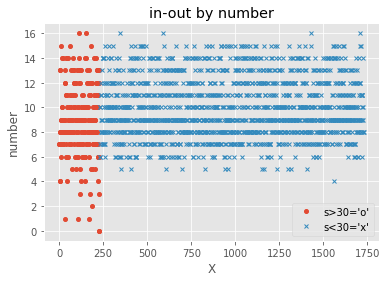

230 230 1500 1500


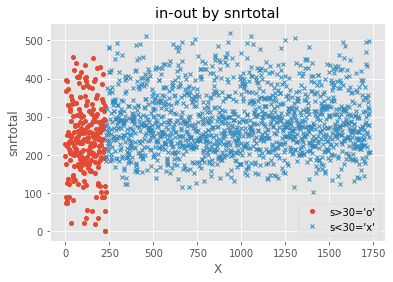

230 230 1500 1500


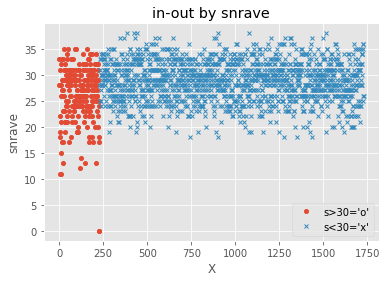

230 230 1500 1500


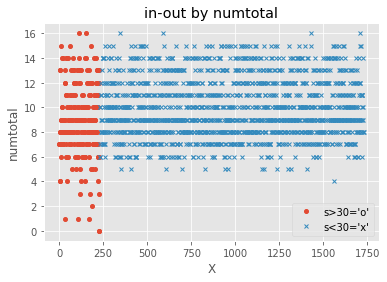

230 230 1500 1500


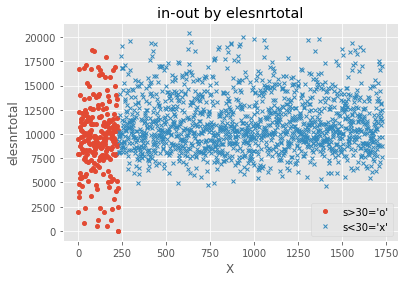

230 230 1500 1500


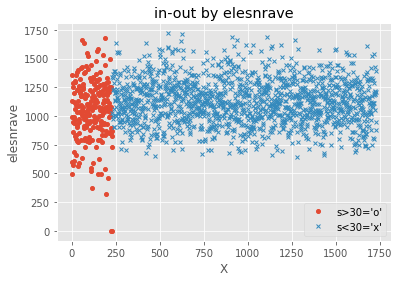

230 230 1500 1500


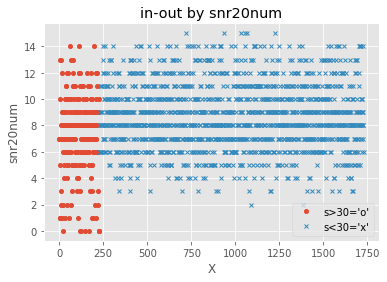

230 230 1500 1500


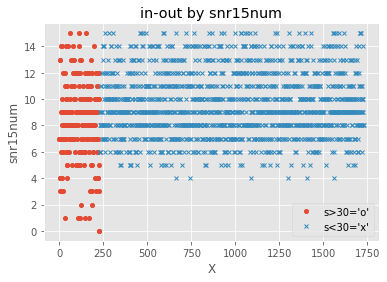

230 230 1500 1500


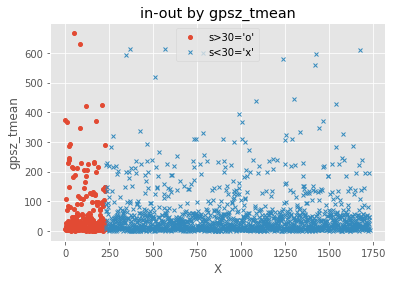

230 230 1500 1500


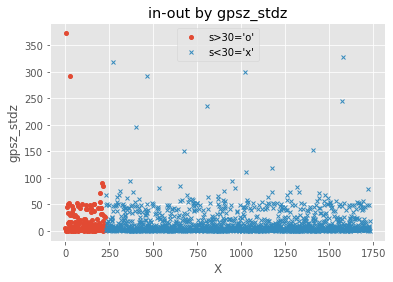

230 230 1500 1500


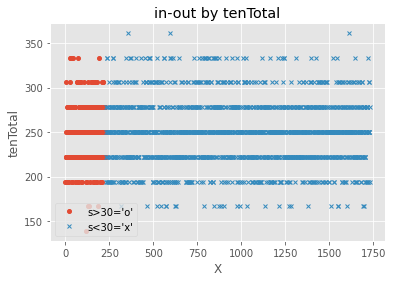

230 230 1500 1500


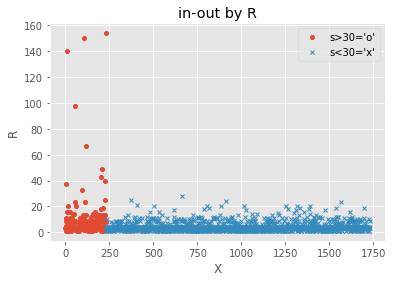

230 230 1500 1500


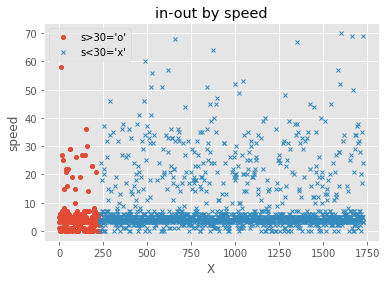

In [ ]:
import matplotlib.pyplot as plt
import math

def transform_cal(fv):
  tmp = fv
  #tmp = int(math.log(fv, 2) + 0.5) 
  #tmp = 1000/math.log(fv+2, 2)
  return int(tmp)

def draw_graph_update(df_tmp, feature="number", mks=['o', 'x'], clr_style='ggplot'):
  tmp = df_tmp.sort_values("Class")
  #
  x, y, clr = [], [], []
  i = 0
  L = len(tmp)
  #i, L = 0, 1000
  division = 0
  while i<L:
    fv = float(tmp[feature].iloc[i])
    inout = tmp["Class"].iloc[i]
    #print(i, fv, inout)
    f = True
    #f = inout=="outdoor"
    if i>0 and tmp["Class"].iloc[i] != tmp["Class"].iloc[i-1]:
      division = i
    if f:
      x.append(i)
      """
      if feature=="snrtotal" and fv>500:
        fv = 500
      if feature=="elesnrtotal" and fv>17500:
        fv = 17500
      if feature=="elesnrave" and fv>1600:
        fv = 1600
      if feature=="gpsz_tmean" and fv>700:
        fv = 700
      if feature=="gpsz_stdz" and fv>500:
        fv = 500
      if feature=="R" and fv>600:
        fv = 600
      
      chosen_features = ["snrtotal", "elesnrtotal", "elesnrave", "gpsz_tmean", "gpsz_stdz", "R"]
      if feature in chosen_features:
        fv = transform_cal(fv)
      """
      if feature=="R" and fv>250:
        fv = 250

      y.append(fv)
      clr.append(inout)
    i = i + 1
  if division==0:
    if tmp["Class"].iloc[-1] == "indoor":
      division = L
    else:
      division = 0
  #
  #mks = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
  #mks = ['o', 'x']
  plt.style.use(clr_style)
  print( len(x[:division]),  len(y[:division]), len(x[division:]), len(y[division:]))
    # https://matplotlib.org/stable/api/markers_api.html
  plt.plot(x[:division], y[:division], mks[0], label="s>30='{0}'".format(mks[0]), markersize=4) #color=cs[0],, color='lightskyblue'
  plt.plot(x[division:], y[division:], mks[1], label="s<30='{0}'".format(mks[1]), markersize=4) # color=cs[1], , color='red'
  plt.legend(numpoints=1)
  plt.xlabel('X')
  plt.ylabel(feature) 
  plt.title("in-out by " + feature)
  plt.show()
  return 

# op_dataxy02.shape, vi_dataxy02.shape, ss_dataxy02.shape
# op_dataxy01.shape, vi_dataxy01.shape, ss_dataxy01.shape
# log_day, log_hour
# cfm_dataxy01, log_dataxy01, out_log01, inout_log01, out_log01, in_log01, 
# log_data_new01, log_data_new02, filter_log02
#tmp = log_dataxy01.loc[ log_dataxy01["Class"]=="indoor" ]

for i in range(13):
  draw_graph_update(log_day3, cols[i])  # log_day, collect_data

In [ ]:
color_style = plt.style.available

import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
import matplotlib.pyplot as plt

def get_xy(tmp, sgn, bv, xlmst, xlmed):
  dic = {}
  for v in tmp:
    v = v//bv
    if v not in dic:
      dic[v] = 1
    else:
      dic[v] = dic[v] + 1
  # print(dic)
  xv = []
  yv = []
  outliers = []
  for k, v in dic.items():
    #if k==0:
      #continue
    if k<xlmst or k>xlmed:
      outliers.append( (k, v) )
      continue
    xv.append(k)
    yv.append(v*sgn)
  print( sorted(outliers) )
  return xv, yv

def draw_bar(dataxy, cols, ft, ttl, xlmst=0, xlmed=18, clr='r', sgn=1, t1=1, t2=1, bv=1):
  #
  fig = plt.figure(figsize = (10*t1, 15*t2))
  ax = fig.add_axes([0,0,1,1])
  #
  lbl = "all"
  if clr=="i":
    clr = 'lightskyblue'
    lbl = "in"
  elif clr=="o":
    clr = 'orange'
    lbl = "out"
  else:
    clr = 'r'
  # -------------------------------------------> in
  tmp = dataxy.loc[ dataxy["Class"]=="indoor" ]
  tmp = tmp[ cols[ft] ]
  xv, yv = get_xy(tmp, -1, bv, xlmst, xlmed)
  clr = 'lightskyblue'
  ax.bar(xv, yv, color=clr) # , 
  # add text
  for x,y in zip(xv, yv):
    plt.text(x, y-10, '%d' % -y, ha='center', va= 'bottom')
  # -------------------------------------------> out
  tmp = dataxy.loc[ dataxy["Class"]=="outdoor" ]
  tmp = tmp[ cols[ft] ]
  xv, yv = get_xy(tmp, 1, bv, xlmst, xlmed)
  clr = 'orange'
  ax.bar(xv, yv, color=clr) # , 
  # add text
  for x,y in zip(xv, yv):
    plt.text(x, y+0.04, '%d' % y, ha='center', va= 'bottom')
  #
  plt.xlim(xlmst, xlmed)
  plt.legend(labels=[lbl], loc='upper right')
  plt.title(ttl + " - " + cols[ft])
  plt.xlabel("value range * " + str(bv))
  plt.ylabel("quantity")
  plt.show()
  return 

"""tmp = draw_bar(log_dataxy01, cols, 0, "log data", 0, 18, 'r')
tmp_log = log_dataxy01.loc[ log_dataxy01["Class"]=="indoor" ]
tmp = draw_bar(tmp_log, cols, 0, "log data", 0, 18, 'i')
tmp_log = log_dataxy01.loc[ log_dataxy01["Class"]=="outdoor" ]
tmp = draw_bar(tmp_log, cols, 0, "log data", 0, 18, 'o')"""
"""
tmp_log = tmp_csv.loc[ tmp_csv["Class"]=="indoor" ]
tmp = draw_bar(tmp_log, cols, 0, title, 0, 18, 'i')
tmp_log = tmp_csv.loc[ tmp_csv["Class"]=="outdoor" ]
tmp = draw_bar(tmp_log, cols, 0, title, 0, 18, 'o')
"""
print()


[]
[]


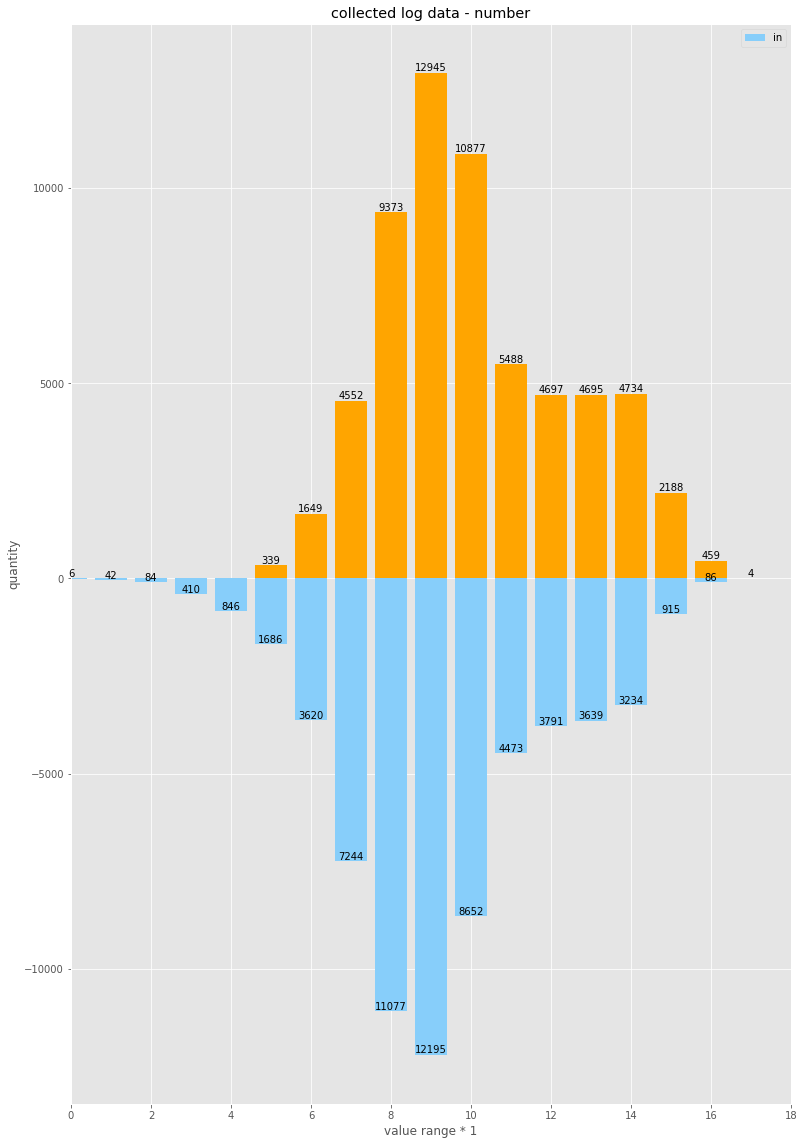

[]
[]


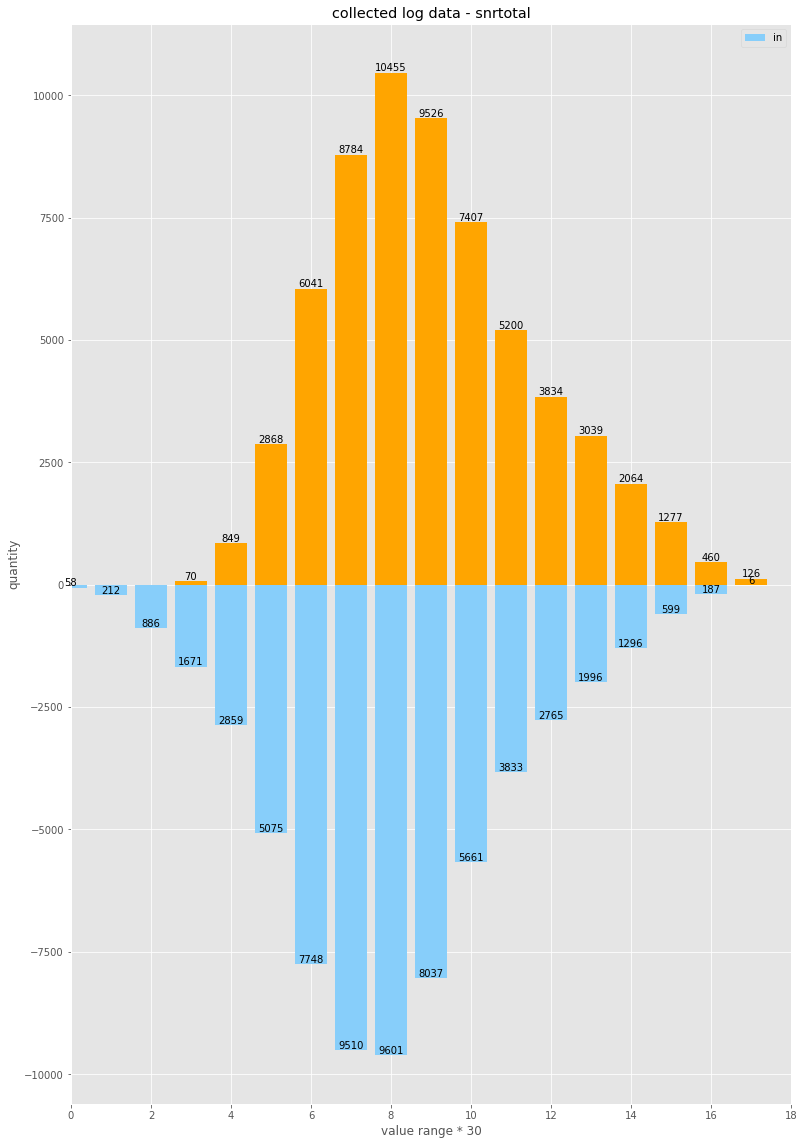

[]
[]


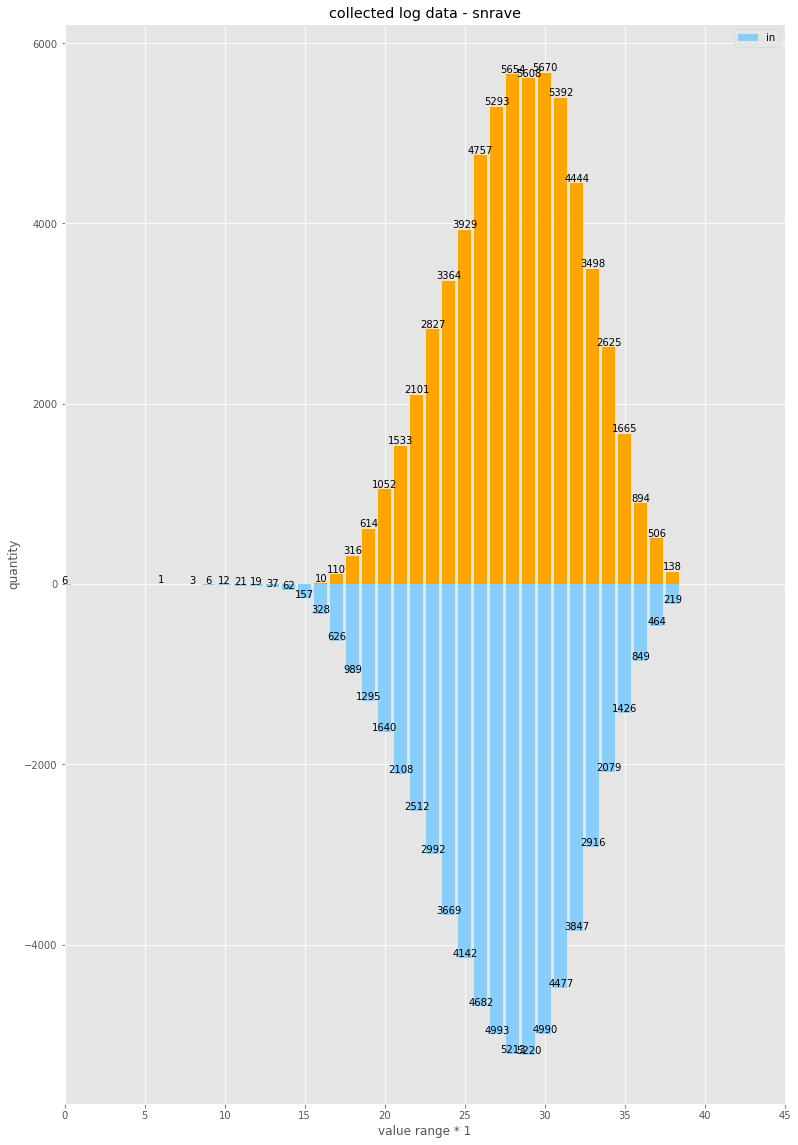

[]
[]


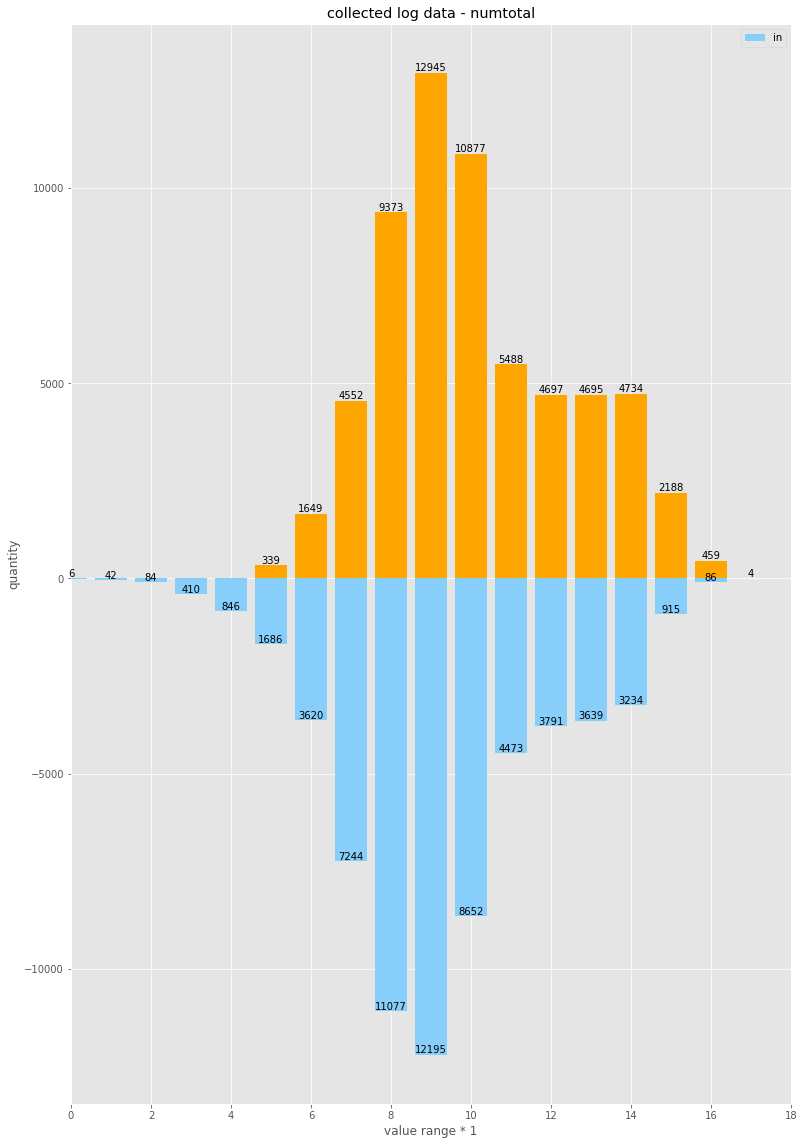

[]
[]


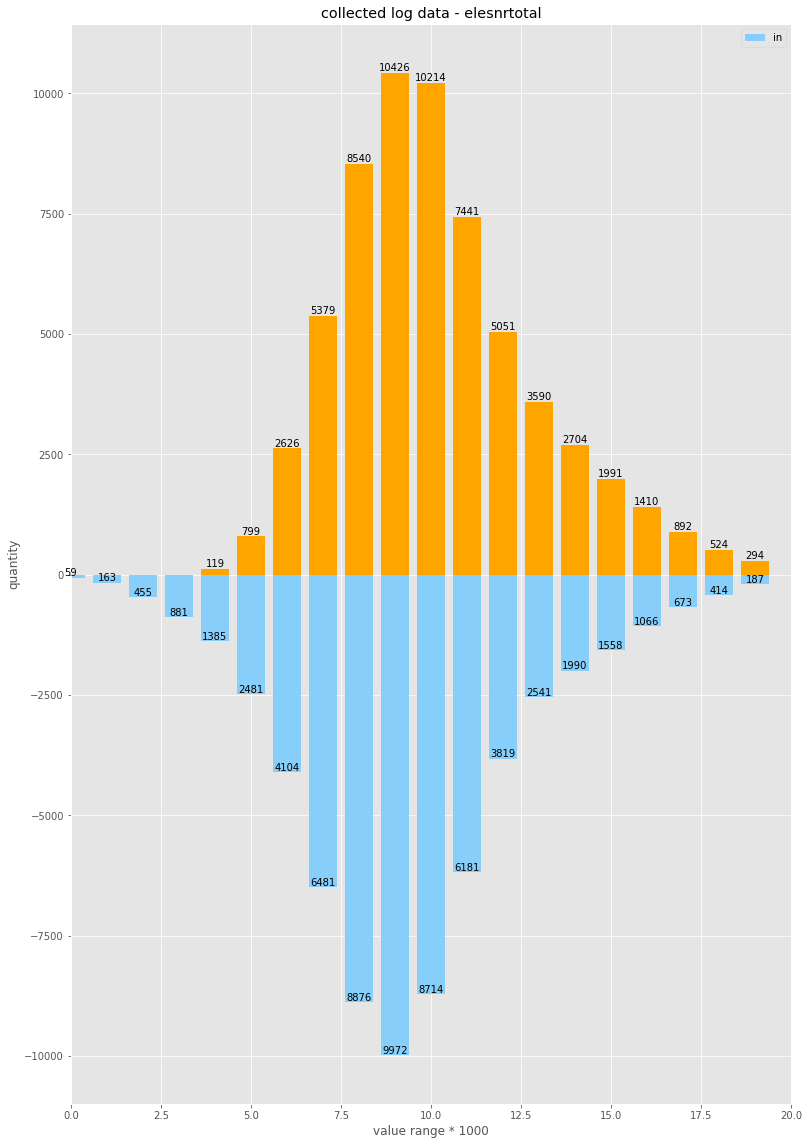

[]
[]


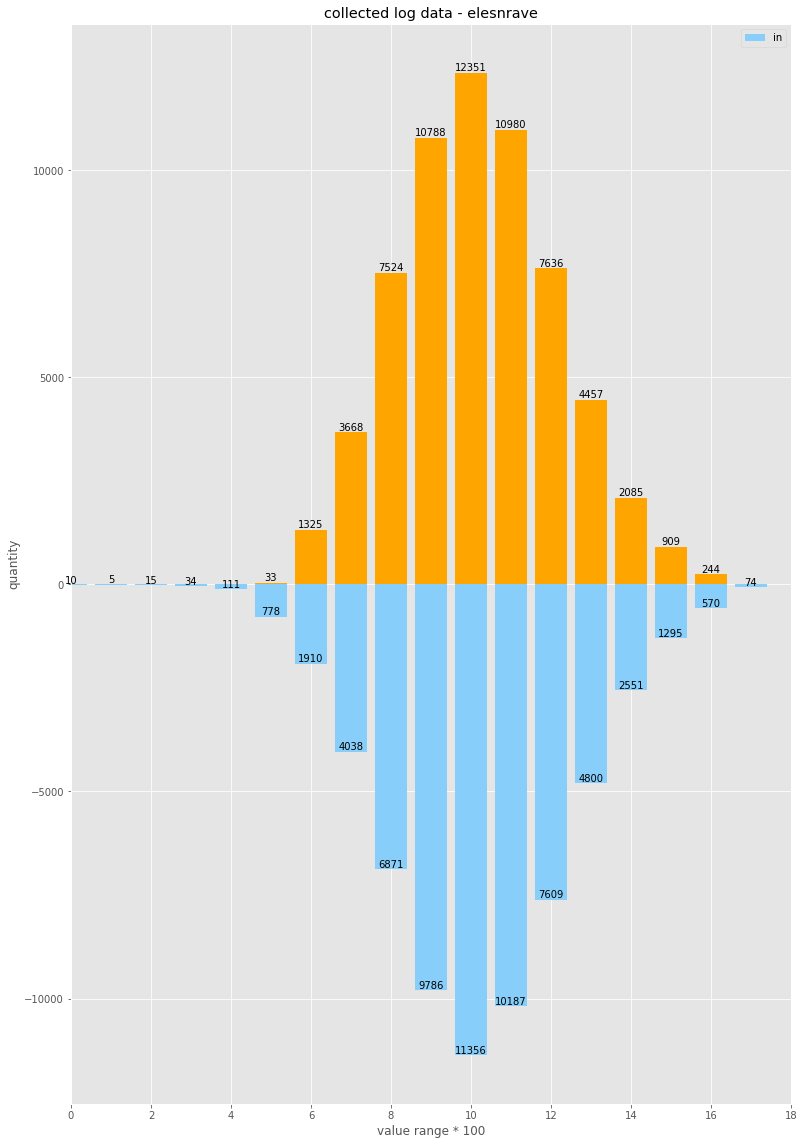

[]
[]


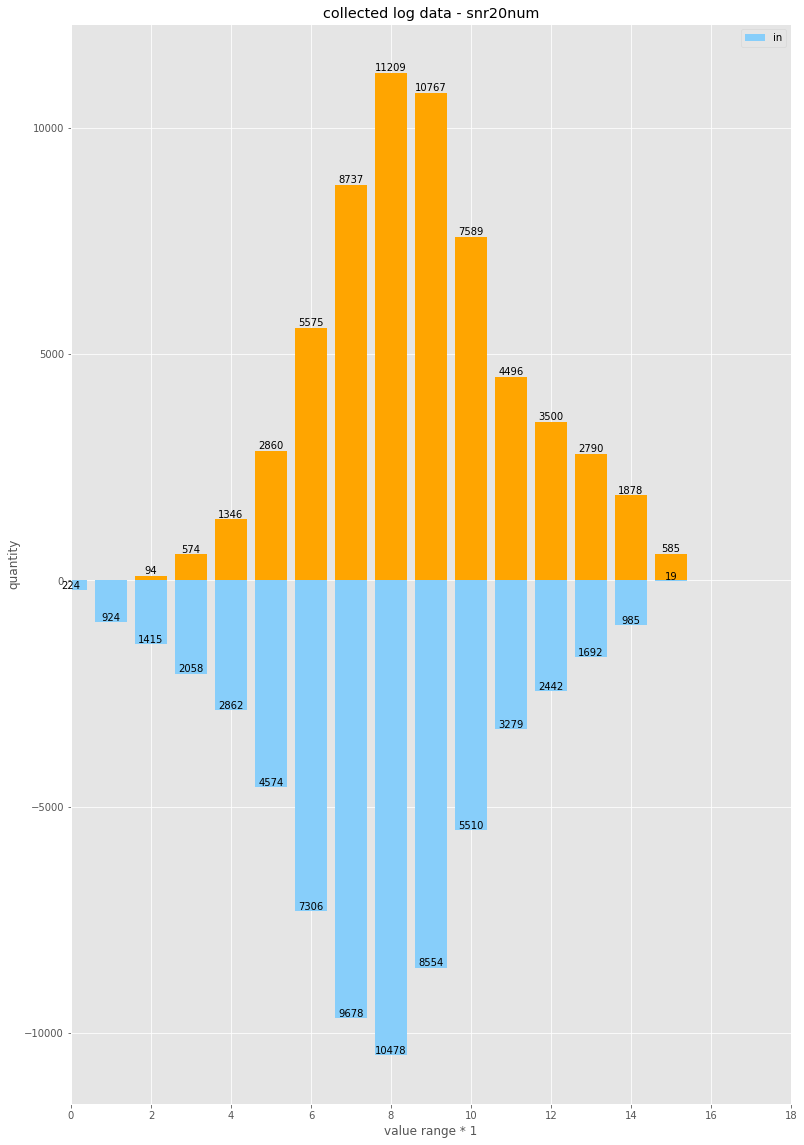

[]
[]


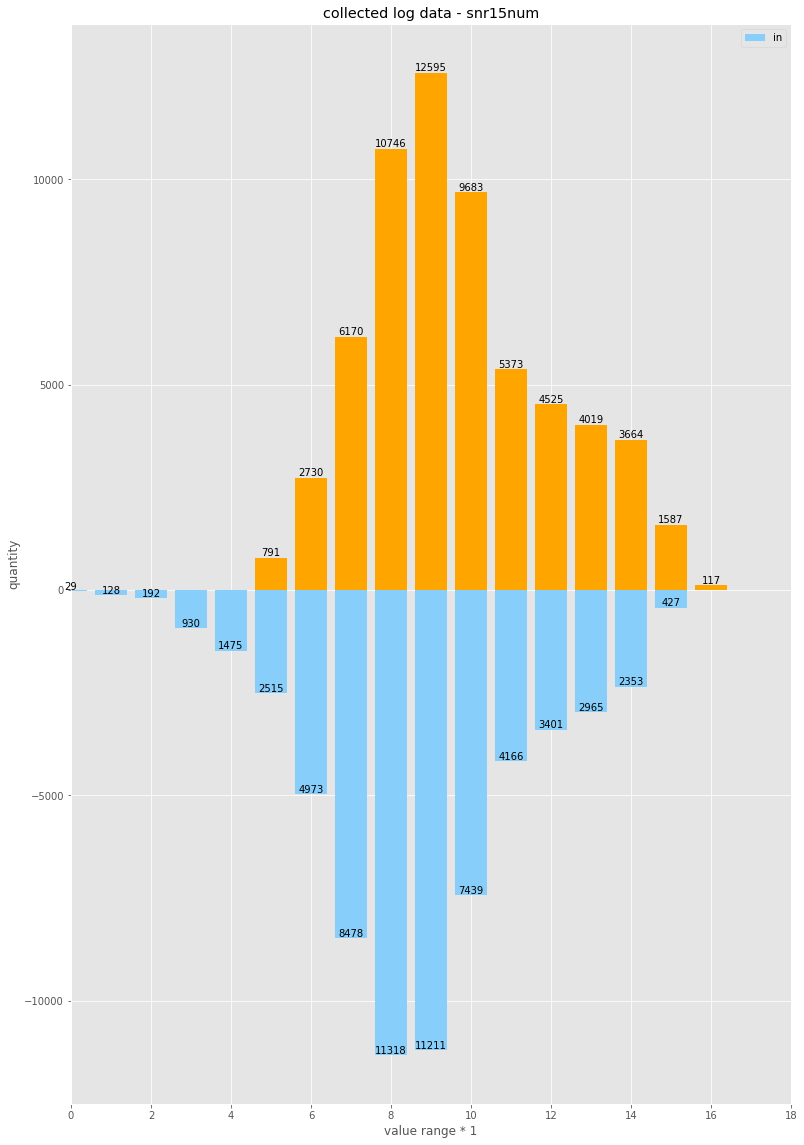

[(61, 1)]
[(61, 3), (62, 3), (64, 1)]


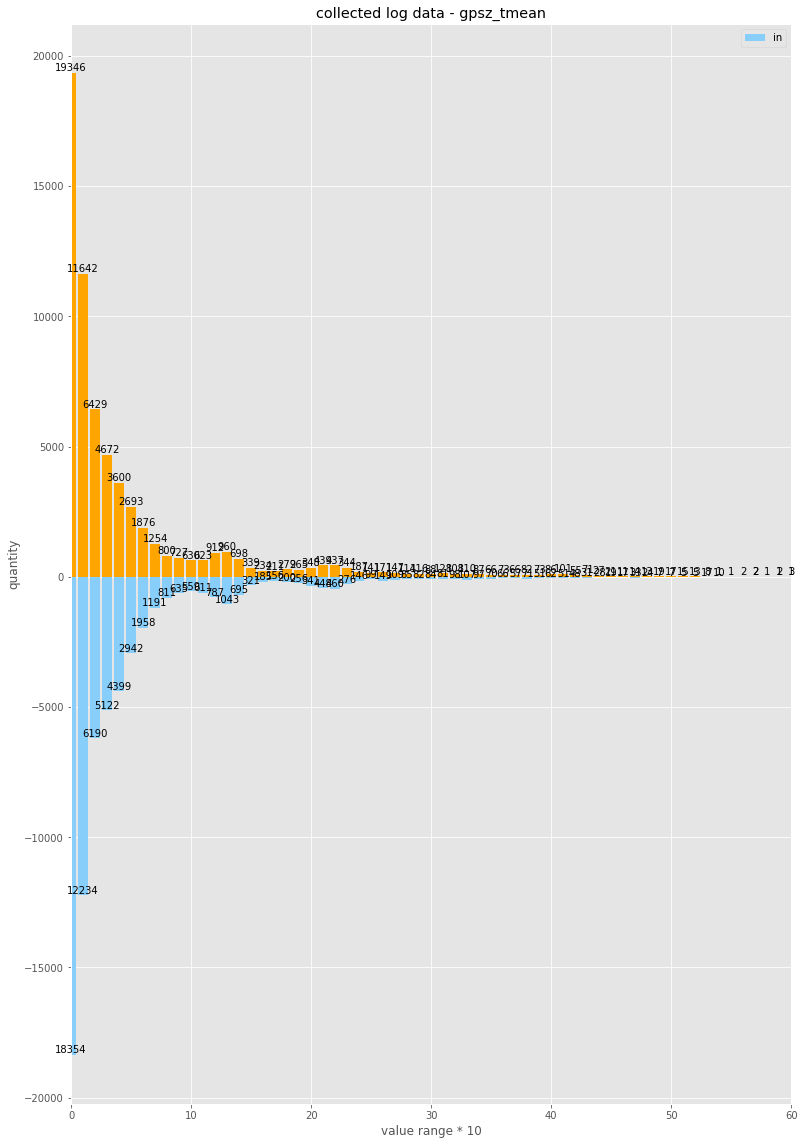

[]
[]


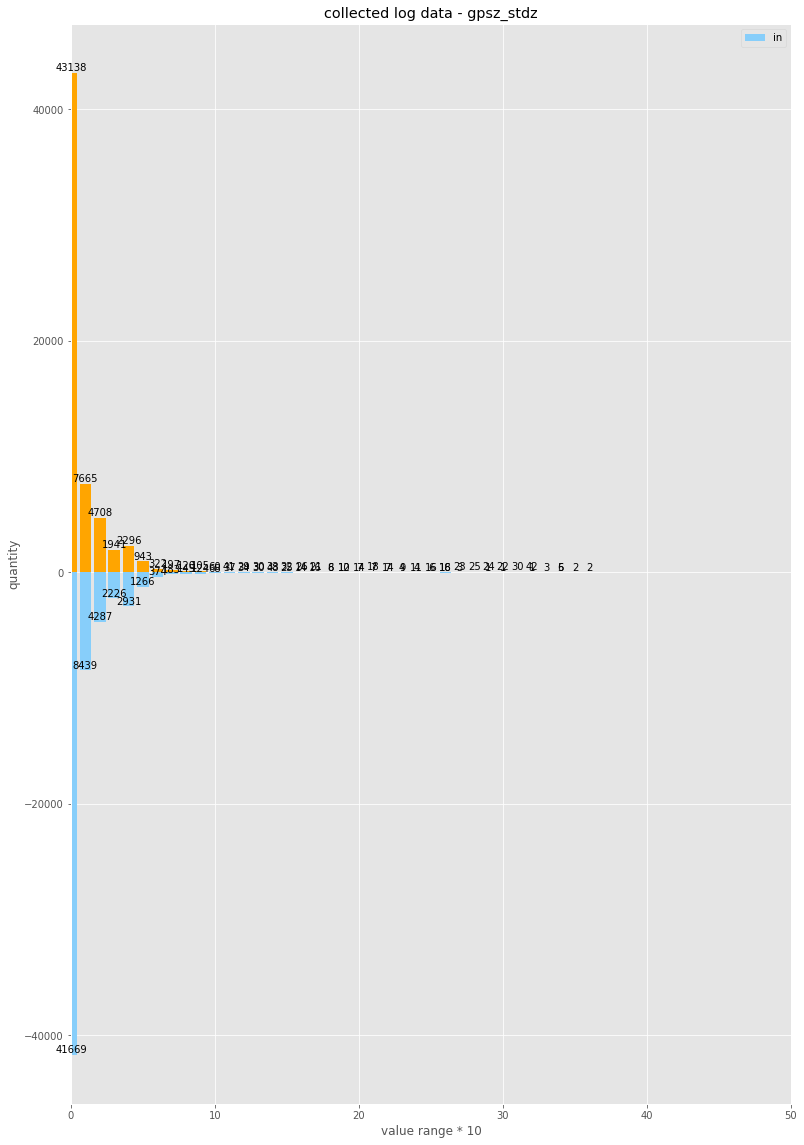

[]
[]


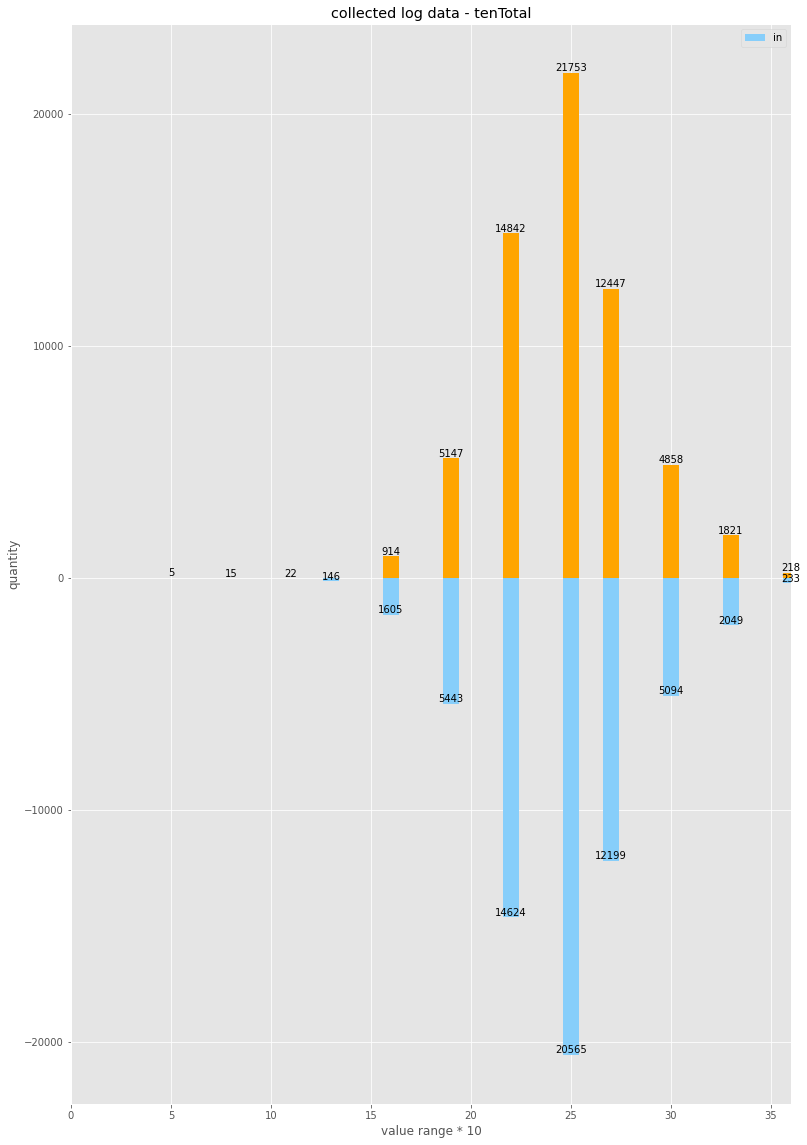

[(60, 1), (66, 1), (85, 1), (95, 1)]
[]


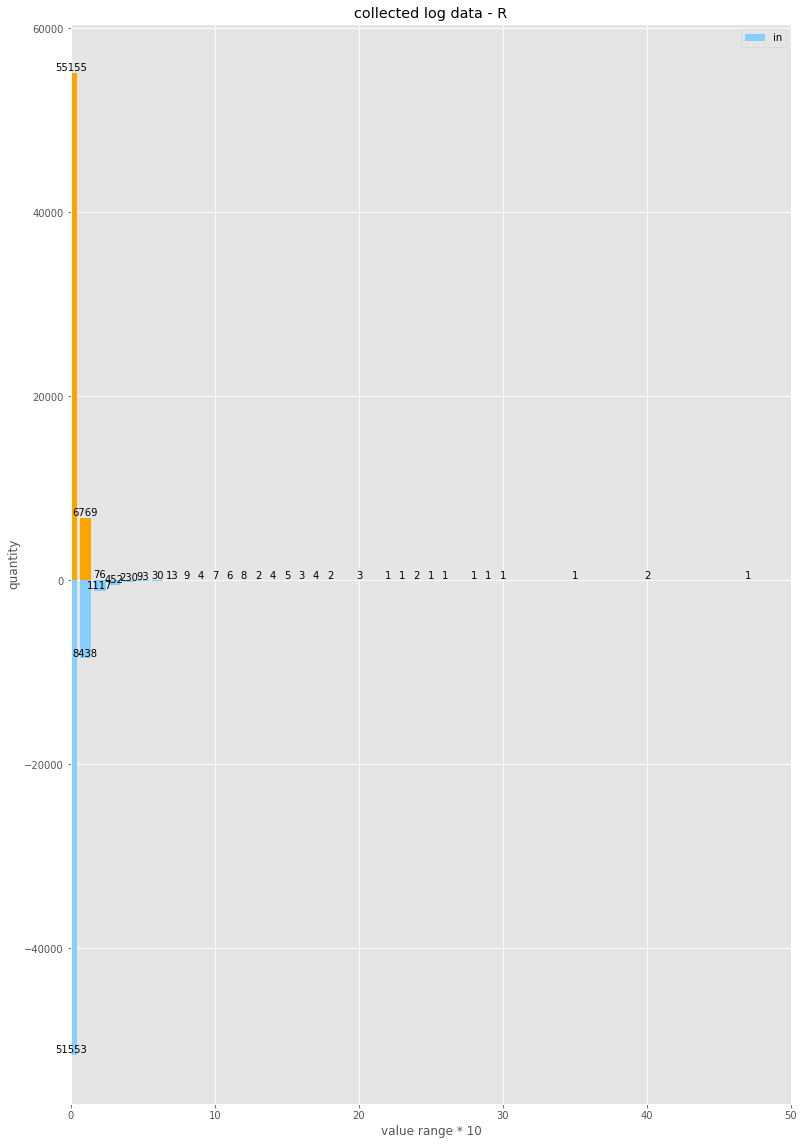

[]
[(51, 870), (52, 898), (53, 862), (54, 815), (55, 814), (56, 825), (57, 749), (58, 624), (59, 458), (60, 364), (61, 290), (62, 229), (63, 133), (64, 9)]


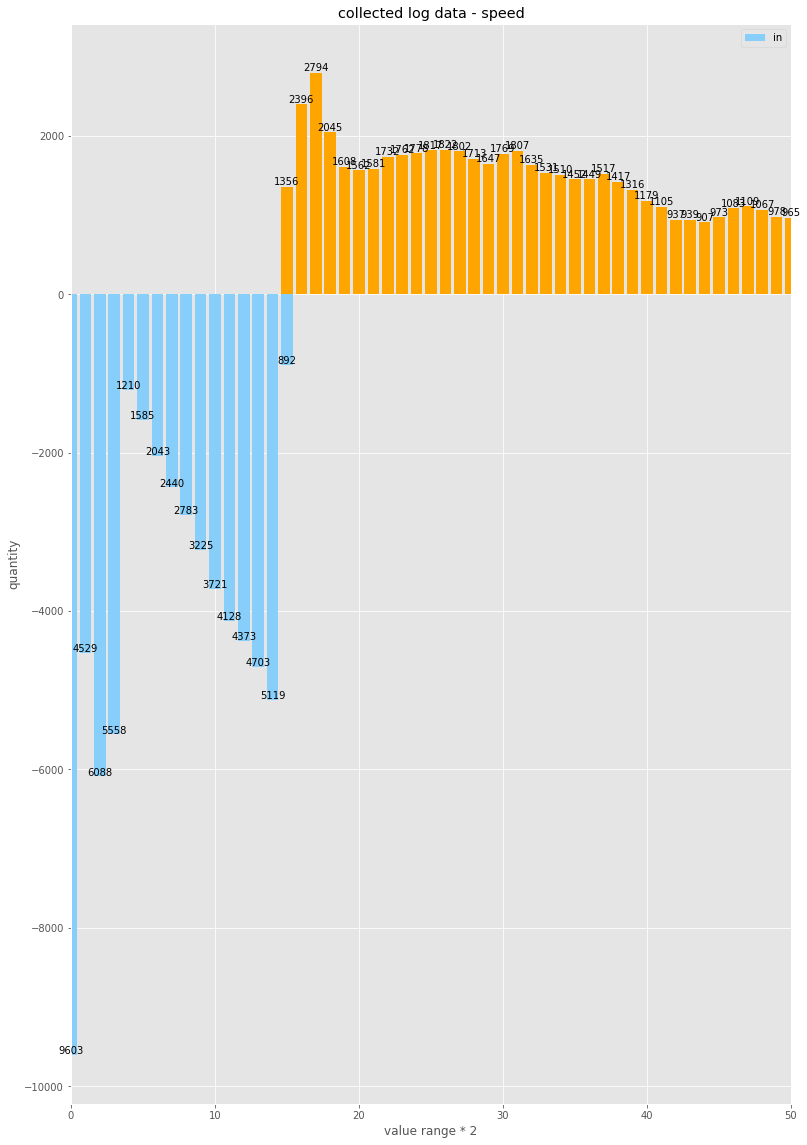

In [ ]:



#tmp = draw_bar(dataxy_sub00, cols, 0, "train data", 0, 18, 'r')
# op_dataxy01.shape, vi_dataxy01.shape, ss_dataxy01.shape
# log_dataxy01
# out_log01, in_log01, inout_log01, filter_log02, log_data_new02

title = "collected log data" # "sdk log data"
tmp_csv = tt.copy() # log_hour
tmp = draw_bar(tmp_csv, cols, 0, title, 0, 18, 'i')

tmp = draw_bar(tmp_csv, cols, 1, title, 0, 18, 'i', bv=30)

tmp = draw_bar(tmp_csv, cols, 2, title, 0, 45, 'i')

tmp = draw_bar(tmp_csv, cols, 3, title, 0, 18, 'i')

tmp = draw_bar(tmp_csv, cols, 4, title, 0, 20, 'i', bv=1000)

tmp = draw_bar(tmp_csv, cols, 5, title, 0, 18, 'i', bv=100)

tmp = draw_bar(tmp_csv, cols, 6, title, 0, 18, 'i')

tmp = draw_bar(tmp_csv, cols, 7, title, 0, 18, 'i')

tmp = draw_bar(tmp_csv, cols, 8, title, 0, 60, 'i', bv=10)

tmp = draw_bar(tmp_csv, cols, 9, title, 0, 50, 'i', bv=10)

tmp = draw_bar(tmp_csv, cols, 10, title, 0, 36, 'i', bv=10)

tmp = draw_bar(tmp_csv, cols, 11, title, 0, 50, 'i', bv=10)

tmp = draw_bar(tmp_csv, cols, 12, title, 0, 50, 'i', bv=2)

Text(0, 0.5, 'cumulative explained variance')

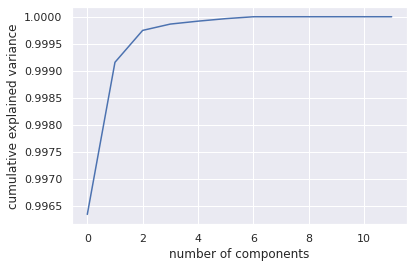

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.decomposition import PCA

ft1 = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','gpsz_stdz','tenTotal','R']
ft2 = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','tenTotal']
ft3 = ['gpsz_tmean','gpsz_stdz','R']


pca = PCA()
# filter_log01, inout_log01
pca_df = log_day.copy()
df_tmp = pca_df[ft1]
df_cls = pca_df['Class']

pca = pca.fit(df_tmp)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

principle components:  1
indoor:  8000 	outdoor:  8000 /tratio:  0.5 ,  0.5


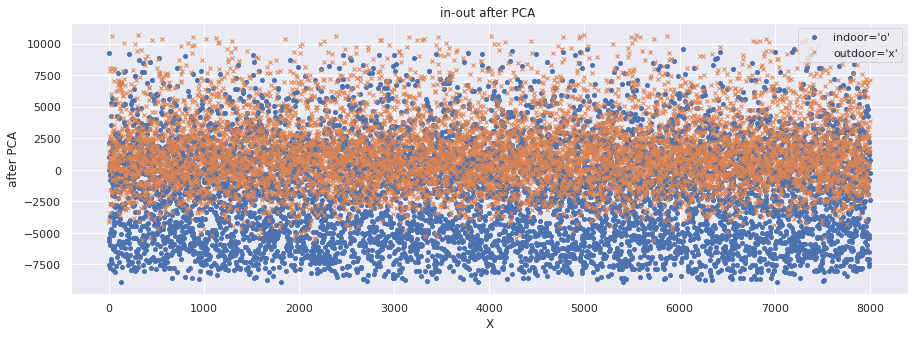

indoor:  8000 	outdoor:  8000 /tratio:  0.5 ,  0.5


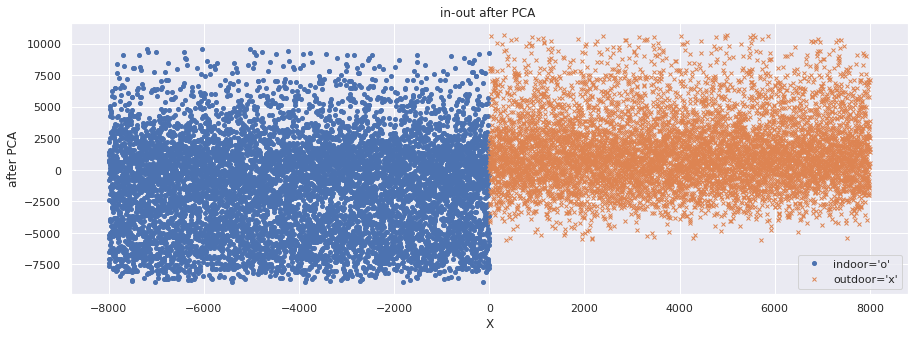

In [ ]:
def draw_pca(components, df_cls, sgn=1):
  assert len(components) == len(df_cls)
  c0, c1 = 0, 0
  x0, x1 = [], []
  y0, y1 = [], []
  i = 0
  while i<len(components):
    if df_cls[i]=='indoor':
      x0.append(c0 * sgn)
      y0.append( components[i] )
      c0 = c0 + 1
    else:
      x1.append(c1)
      y1.append( components[i] )
      c1 = c1 + 1
    i = i + 1 
  #
  print("indoor: ", len(y0), "\toutdoor: ", len(y1), "/tratio: ", len(y0)/(len(y0)+len(y1)), ", ", len(y1)/(len(y0)+len(y1)))
  fig = plt.figure(figsize = (5*3, 5*1))

  plt.plot(x0, y0, 'o', label="indoor='{0}'".format('o'), markersize=4) #color=cs[0],
  plt.plot(x1, y1, 'x', label="outdoor='{0}'".format('x'), markersize=4) # color=cs[1], 
  plt.legend(numpoints=1)
  plt.xlabel('X')
  plt.ylabel('after PCA') 
  plt.title("in-out after PCA ")
  plt.show()
  return 

# 
np.random.seed(2)
pca = PCA(0.99).fit(df_tmp)
print("principle components: ", pca.n_components_)
components = pca.transform(df_tmp)

draw_pca(components, df_cls.to_numpy())
draw_pca(components, df_cls.to_numpy(), -1)

indoor:  8000 	outdoor:  8000 /tratio:  0.5 ,  0.5


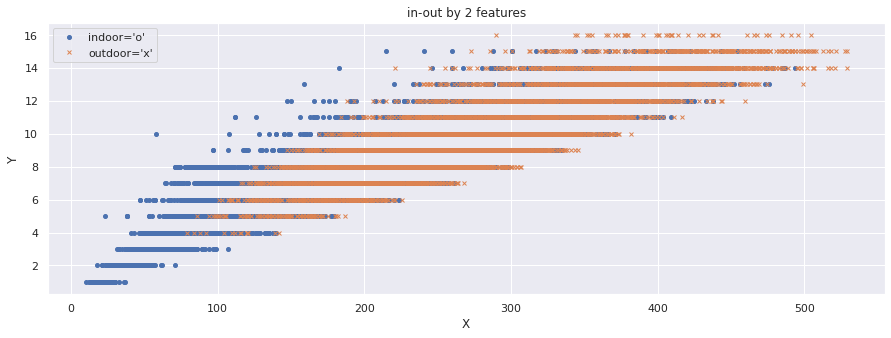

indoor:  8000 	outdoor:  8000 /tratio:  0.5 ,  0.5


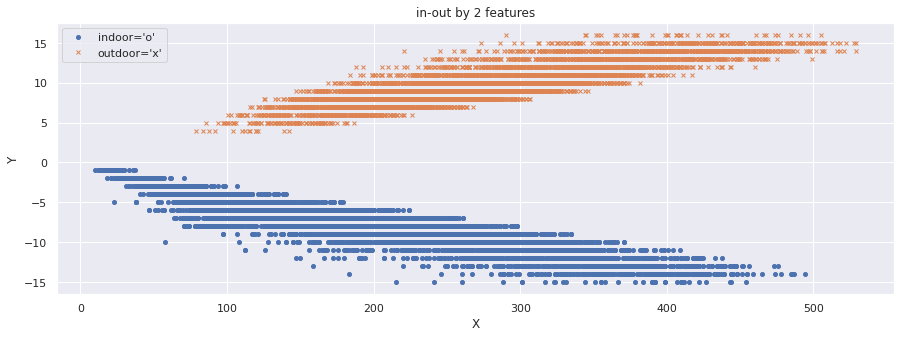

In [ ]:
# filter_log01, inout_log01
pca_df = log_day.copy()
df_tmp = pca_df[ft1]
df_cls = pca_df['Class']

def get2features(df_tmp, n1=0, n2=1):
  ft1 = ['number','snrtotal','snrave','numtotal','elesnrtotal','elesnrave','snr20num','snr15num','gpsz_tmean','gpsz_stdz','tenTotal','R']
  x = df_tmp[ft1[n1]].to_numpy()
  y = df_tmp[ft1[n2]].to_numpy()
  #
  i = 0
  cpn = []
  while i<len(x):
    cpn.append( [x[i], y[i]] )
    i = i + 1
  return cpn

def draw_pca01(components, df_cls, offsetx=0, offsety=0, sgnx=1, sgny=1):
  assert len(components) == len(df_cls)
  c0, c1 = 0, 0
  x0, x1 = [], []
  y0, y1 = [], []
  i = 0
  while i<len(components):
    if df_cls[i]=='indoor':
      x0.append( components[i][0]*sgnx + offsetx )
      y0.append( components[i][1]*sgny + offsety )
      c0 = c0 + 1
    else:
      x1.append( components[i][0] )
      y1.append( components[i][1] )
      c1 = c1 + 1
    i = i + 1 
  #
  print("indoor: ", len(y0), "\toutdoor: ", len(y1), "/tratio: ", len(y0)/(len(y0)+len(y1)), ", ", len(y1)/(len(y0)+len(y1)))
  fig = plt.figure(figsize = (5*3, 5*1))

  plt.plot(x0, y0, 'o', label="indoor='{0}'".format('o'), markersize=4) #color=cs[0],
  plt.plot(x1, y1, 'x', label="outdoor='{0}'".format('x'), markersize=4) # color=cs[1], 
  plt.legend(numpoints=1)
  plt.xlabel('X')
  plt.ylabel('Y') 
  plt.title("in-out by 2 features")
  plt.show()
  return 

components2 = get2features(df_tmp, n1=1, n2=3)
draw_pca01(components2, df_cls.to_numpy(), 0, 0, 1, 1)
draw_pca01(components2, df_cls.to_numpy(), 0, 0, 1, -1)

#draw_pca01(components2, df_cls.to_numpy(), 0, 1500)

indoor:  600 	outdoor:  1800 /tratio:  0.25 ,  0.75


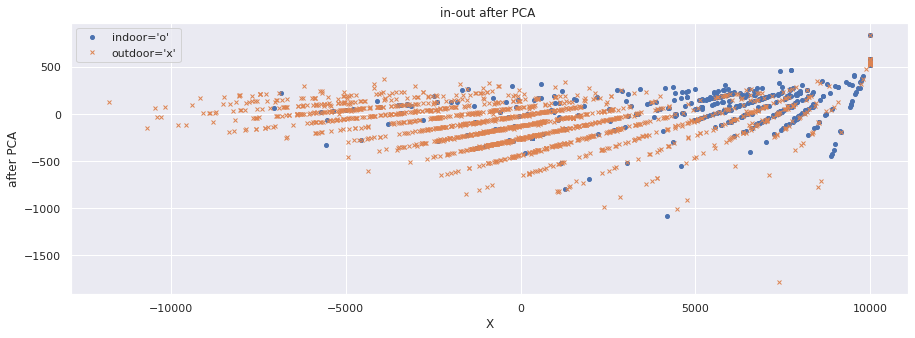

indoor:  600 	outdoor:  1800 /tratio:  0.25 ,  0.75


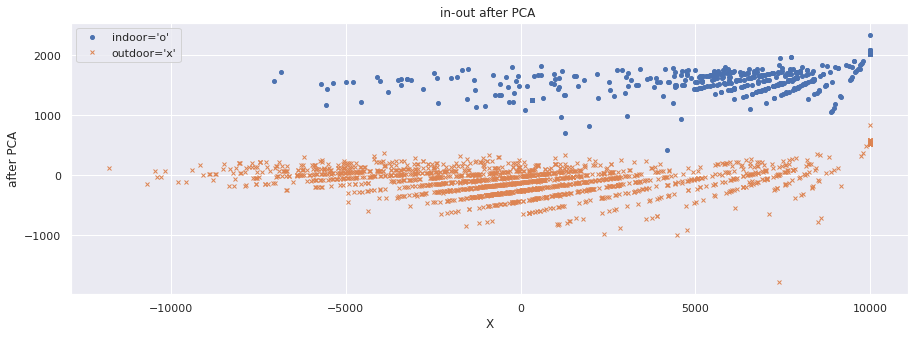

In [ ]:
pca_df = filter_log02.copy()
df_tmp = pca_df[ft1]
df_cls = pca_df['Class']
components2 = pca.transform(df_tmp)
components2

draw_pca01(components2, df_cls.to_numpy())
draw_pca01(components2, df_cls.to_numpy(), 0, 1500)

In [ ]:
components2

array([[ 6675.98970404,   240.01248506],
       [ 5005.01092706,    47.71306382],
       [ 9600.18659126,   232.15170785],
       ...,
       [-1850.70408446,   -17.4425817 ],
       [ 2777.83741687,   -39.69257717],
       [  -38.14652862,  -265.23713916]])

In [ ]:
components2[:30]

array([[ 6675.98970404,   240.01248506],
       [ 5005.01092706,    47.71306382],
       [ 9600.18659126,   232.15170785],
       [ 7947.7097685 ,   217.55769438],
       [ 9987.87124675,   576.00344162],
       [ 9987.91604348,   570.49001704],
       [ 7660.59892886,    76.24816857],
       [ 9987.88027055,   574.89282372],
       [  337.45154223,  -254.66407477],
       [ 7249.22825857,  -214.17545265],
       [  496.03778881,   168.85946698],
       [ 3707.82599199,   112.63761329],
       [  337.45154223,  -254.66407477],
       [ 9987.87124675,   576.00344162],
       [ 5152.61863312,   -47.73013065],
       [ 9986.91569402,   534.36256108],
       [ 5636.66753836,   239.38342632],
       [  870.75610558,    36.49114079],
       [ 9987.87575865,   575.44813267],
       [ 9471.63654038,   302.77842826],
       [ -781.6578117 ,   168.20897241],
       [  577.22553025,   172.40987407],
       [ 6417.51796149,   183.19471398],
       [ 5760.3813849 ,   188.71215484],
       [ 9987.86

In [ ]:

filter_log01.corr()

,number,snrtotal,snrave,numtotal,elesnrtotal,elesnrave,snr20num,snr15num,gpsz_tmean,gpsz_stdz,tenTotal,R
number,1.000000,0.890676,0.073196,1.000000,0.860832,-0.055396,0.866051,0.957757,0.151130,0.131619,0.073786,-0.390086
snrtotal,0.890676,1.000000,0.494314,0.890676,0.969956,0.321362,0.946089,0.925399,0.106889,0.085853,0.000261,-0.467457
snrave,0.073196,0.494314,1.000000,0.073196,0.486544,0.841581,0.436955,0.211007,-0.128119,-0.135845,-0.144263,-0.319937
numtotal,1.000000,0.890676,0.073196,1.000000,0.860832,-0.055396,0.866051,0.957757,0.151130,0.131619,0.073786,-0.390086
elesnrtotal,0.860832,0.969956,0.486544,0.860832,1.000000,0.433464,0.915910,0.885347,0.117579,0.098947,-0.009408,-0.479161
elesnrave,-0.055396,0.321362,0.841581,-0.055396,0.433464,1.000000,0.278891,0.056469,-0.053037,-0.053586,-0.127767,-0.330400
snr20num,0.866051,0.946089,0.436955,0.866051,0.915910,0.278891,1.000000,0.924079,0.118081,0.098413,-0.021474,-0.474008
snr15num,0.957757,0.925399,0.211007,0.957757,0.885347,0.056469,0.924079,1.000000,0.139433,0.118720,0.039069,-0.414825
gpsz_tmean,0.151130,0.106889,-0.128119,0.151130,0.117579,-0.053037,0.118081,0.139433,1.000000,0.991310,-0.031249,-0.152998
gpsz_stdz,0.131619,0.085853,-0.135845,0.131619,0.098947,-0.053586,0.098413,0.118720,0.991310,1.000000,-0.034785,-0.153696


In [ ]:
f = open("st01.txt","r")
lns = f.readlines()
for ln in lns[:5]:
  print(ln)


ll_h:6.60,ll_n:32,ll_r:2,gnsf:856|8562|10|278|9|8|23|228,s:6.9,mb:V2057A,inout_flag:0,llx:123.18563,lly:41.29068,llr:20,0

ll_h:79.38,ll_n:20,ll_r:4,gnsf:871|8705|10|278|10|9|25|245,s:100.2,mb:CLT-AL00,inout_flag:0,llx:114.1703,lly:35.57035,llr:20,0

ll_h:1444.16,ll_n:15,ll_r:9,gnsf:781|7808|10|222|10|7|23|232,s:26.9,mb:PCKM00,inout_flag:0,llx:109.94531,lly:39.81925,llr:20,0

ll_h:385.20,ll_n:35,ll_r:1,gnsf:1195|8366|7|306|7|6|30|207,s:4.7,mb:V2072A,inout_flag:0,llx:108.89301,lly:34.2413,llr:20,0

ll_h:149.60,ll_n:39,ll_r:11,gnsf:1183|11828|10|278|10|8|29|291,s:25.0,mb:PDYM20,inout_flag:0,llx:121.63104,lly:42.01391,llr:20,0



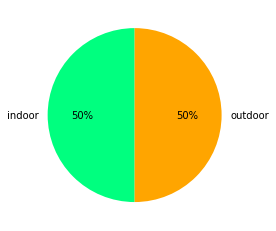

In [ ]:
# 1
import matplotlib.pyplot as plt
import numpy as np

y = np.array([50, 50])
mylabels = ["indoor", "outdoor"]
colors = ( "springgreen", "orange")

plt.pie(y, labels = mylabels, autopct='%1.0f%%', colors = colors, startangle = 90)
plt.show() 

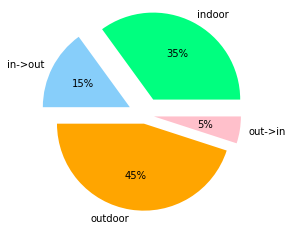

In [ ]:
y = np.array([35, 15, 45, 5])
mylabels = ["indoor", "in->out", "outdoor", "out->in"]
myexplode = [0.2, 0.2, 0.1, 0.1]
colors = ( "springgreen", "lightskyblue", "orange", "pink")

plt.pie(y, labels = mylabels, autopct='%1.0f%%', colors = colors, explode = myexplode)
plt.show() 

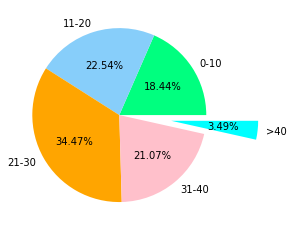

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([12802, 160092, 2312, 9029, 391+668] )
mylabels = ["msr=0", "msr=1", "msr=3", "msr=5", "msr=7&9" ]
myexplode = [0.0, 0.0, 0.6, 0.6, 0.9]
colors = ( "springgreen", "lightskyblue", "orange", "pink", "cyan")

y = np.array([1890, 142, 126, 154] )
mylabels = ["0-10", "11-20", "21-30", ">30"]
myexplode = [0.0, 0.0, 0.6, 0.6]
colors = ( "springgreen", "lightskyblue", "orange", "pink")

y = np.array([1665, 2035, 3112, 1902, 315] )
mylabels = ["0-10", "11-20", "21-30", "31-40", ">40"]
myexplode = [0.0, 0.0, 0.0, 0.0, 0.6]
colors = ( "springgreen", "lightskyblue", "orange", "pink", "cyan")

plt.pie(y, labels = mylabels, autopct='%1.2f%%', colors = colors, explode = myexplode)
plt.show() 

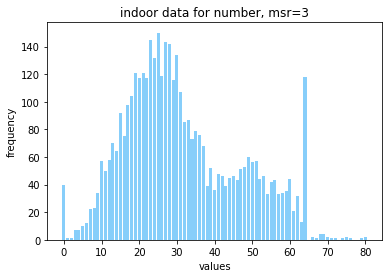